# Name - Ratul Chakraborty
## BDA 2nd Sem
## Reg - B2130041

# Section - 1

## Satelite Image Classification

 - Remote Sensing image interpretation has been on demand.
 - Remote Sensing has its use in domain of object indentification, self driving cars, AI decision making and etc.
 - The target here, is terrain  classification from satelite image remotely and swiftly.
 -  Also, to find which optimizer works good for this purpose.

# Section - 2

## Dataset

The dataset is from kaggle, satelite image classification 

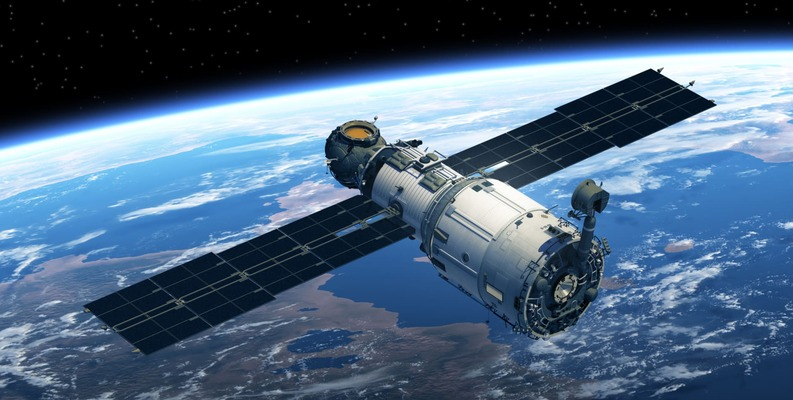

<a href="https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification">https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification</a>

## Description

- The dataset in total consists of 4 folders "water", "green_area", "cloudy", "desert". Each folder consists satelite images of those regions. 
- The first two folders "water", "green_area" consists of (64, 64, 3) RGB images. Both for "water" and "green_area", we found 1500 images.

- The other two folders "cloudy", "desert" consists of (256, 256, 4) CMYK images. For, "cloudy" thare are 1500 images, for "desert" there are 1131 images.

- There is a total of 5631 images

# Section - 3

## Major Findings

- Stochastic Gradient Descent (SGD) has surprisingly outperformed other optimization techniques Adam, Adagrad, RMSProp, SGD Minibatching, SGD Momentum.
> 
- Adam, SGD Momentum and RMSProp are the three to atisfy the condition for EarlyStopping.
- It means they converged even before completing all 200 epochs.

- SGD is known to be not reliable due to its stochastic nature. But, in this case its stochasticness has helped it to converge to Minima in subspace in a much better way, with a whopping 97.99% accuracy.
> 
- RMSProp has worked comparitively worst with a 86.39% accuracy.
- Though, it has managed to converge much faster in only 109 epochs.

# Section - 4

## Data Preprocessing

- Images were read from those 4 folders. 
- RGB images were kept as it is and stored in a list after converting them to numpy arrays. 
- CMYK images were transformed into RGB images and resized into 64*64 images. Again, they were stored into the same list after converting into numpy arrays.

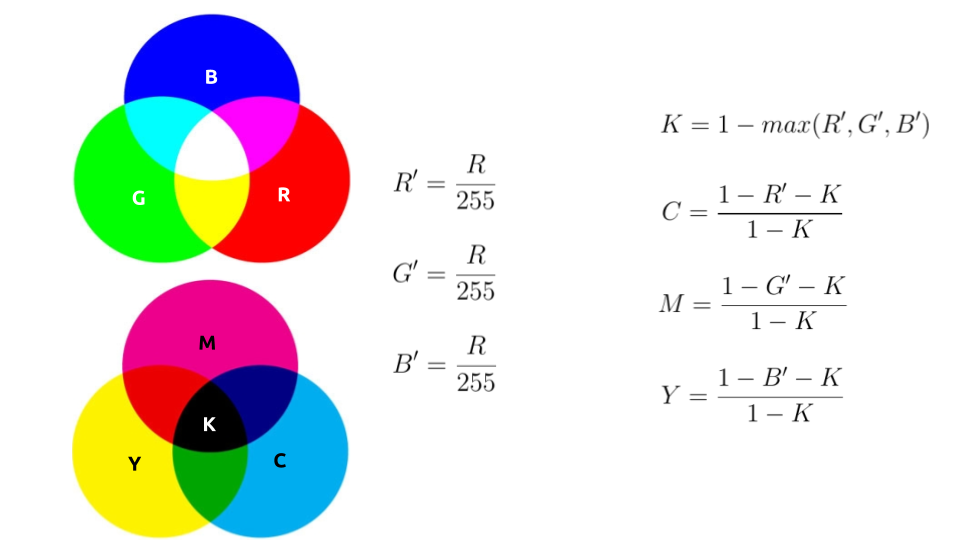
> 
- As, for labels they were made along side the images by using their folder names, by appending into a list one-by-one. 
- classes were assigned numbers, "Water" = 0, "green_area" = 1, "cloudy" = 2, "desert" = 3.
> 
- In the end, both the lists were transformed into numpy arrays using np.stack(). And, the labels were categorized (one hot encoded).

- After train test split, they were transformed into tensors to fit into neural networks to speed things up.

# Libraries

In [2]:
import os
from PIL import Image

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam , Adagrad, SGD, RMSprop
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [3]:
path = "/content/drive/MyDrive/Satelite Image"

In [4]:
os.chdir(path)

In [5]:
l = os.listdir()

In [6]:
def num_hot(x):
  if x == "water":
    return 0
  if x == "green_area":
    return 1
  if x == "cloudy": 
    return 2
  if x == "desert":
    return 3

In [7]:
images = []
labels = []
one_hot_label =[]
num_labels = []
for m in l:
  os.chdir(f"{path}/{m}")
  num = 0
  for n in os.listdir():
    num += 1
    im = Image.open(n)
    if im.mode == 'CMYK':
      im = im.convert('RGB')
    im = im.resize((64, 64))
    im = np.array(im)/255
    images.append(im)
    labels.append(m)
    num_labels.append(num_hot(m))
  print(f"Finished {m}")
  print(im.shape)
  print(f"Found {num} images.")

Finished water
(64, 64, 3)
Found 1500 images.
Finished green_area
(64, 64, 3)
Found 1500 images.
Finished cloudy
(64, 64, 3)
Found 1500 images.
Finished desert
(64, 64, 3)
Found 1131 images.


In [8]:
images = np.stack(images, axis = 0)

In [9]:
labels = np.stack(labels , axis=0)

In [10]:
num_labels = np.array(num_labels)

In [11]:
num_labels.shape

(5631,)

In [12]:
images.shape

(5631, 64, 64, 3)

In [13]:
labels.shape

(5631,)

# Visualization

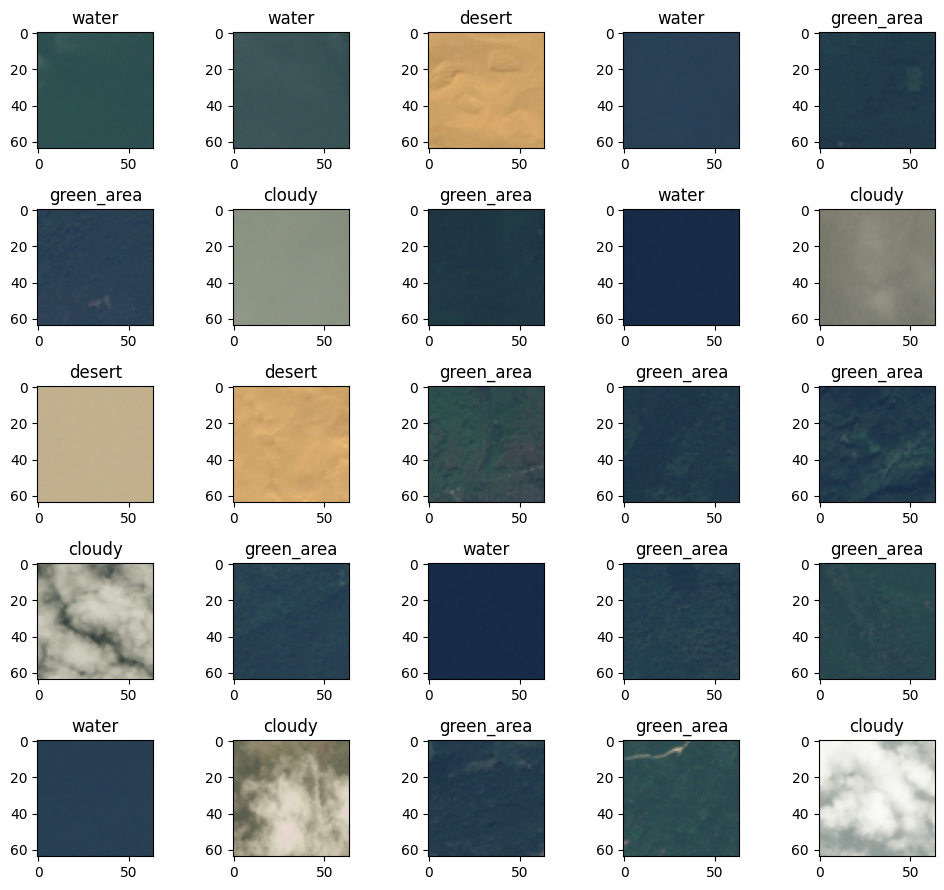

In [14]:
rand_ind = np.random.randint(0, 5631, 25)

fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (10, 9), dpi = 100)
k = 0
for i in range(5):
  for j in range(5):
    axes[i][j].imshow(images[rand_ind[k]])
    axes[i][j].set_title(labels[rand_ind[k]])
    k += 1
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of different classes')

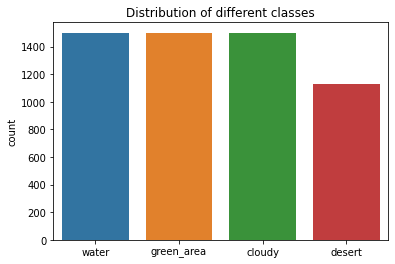

In [15]:
sns.countplot(labels)
plt.title("Distribution of different classes")

In [16]:
data_labels = to_categorical(num_labels)
data_labels.shape

(5631, 4)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(images, data_labels, test_size = 0.15, random_state = 49)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 49)

x_train = tf.convert_to_tensor(x_train)
x_val = tf.convert_to_tensor(x_val)
x_test = tf.convert_to_tensor(x_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
y_val = tf.convert_to_tensor(y_val)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(3828, 64, 64, 3)
(958, 64, 64, 3)
(845, 64, 64, 3)
(3828, 4)
(958, 4)
(845, 4)


- 15% of the data has been taken as test data. [845] 
- 20% of the slit data has been taken as validation data. (17% of the dataset) [958]
- Remainder has been used as train data. [3828]

# Section - 5

## Model Description

- Here, I have chosen a simple CNN derived from Lenet-5. 
- As, it is a very old and trusty model. Also, it is conputationally less costly.

- It has 2 Convolutional layer. Along with 2 Maxpooling layer.

- At the end it has 2 fully-connected layer. 

- RELU have been used as the activation function for all layers except Output Layer.
- The output layer uses Softmax activation function.
> 
- Lenet-5

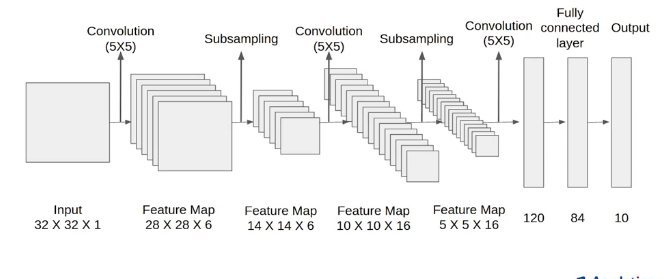


### Hyper-parameters

- Learning rate for all the different optimizer is 0.01, with a decay of 0.0001.
- Batch size for the each epoch (except SGD and SGD Momentum) has been set to 64.(a very standard choice)
- Momentum for SGD Momentum has been set to 0.5

# Build CNN

In [171]:
# Hyper parameters
num_classes = 4
learning_rate = 0.01
batch_size = 64
num_epochs = 200
decay = 0.0001
momentum = 0.5

In [19]:
def get_model():
    model = keras.models.Sequential()

    model.add(Conv2D(filters=32, kernel_size= (5,5), activation='relu', padding='same', input_shape=(64,64,3)))
    model.add(MaxPool2D((4,4)))

    model.add(Conv2D(filters= 16, kernel_size=(5,5), activation='relu', padding='same'))
    model.add(MaxPool2D((2,2)))

    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# ADAM

In [94]:
keras.backend.clear_session()

In [95]:
model_adam = get_model()
model_adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        12816     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 200)               2

In [96]:
model_adam.compile(optimizer=Adam(learning_rate=learning_rate, decay = decay) , 
              loss='categorical_crossentropy', metrics = ["accuracy"])

In [97]:
callback = EarlyStopping(monitor = "loss", patience = 10, restore_best_weights=True) 

model_adam_history = model_adam.fit(x_train,y_train, validation_data=(x_val, y_val) , epochs= num_epochs, batch_size= batch_size, callbacks = [callback])

Epoch 1/200
60/60 [==============================] - 1s 14ms/step - loss: 1.1209 - accuracy: 0.5232 - val_loss: 0.5390 - val_accuracy: 0.7871
Epoch 2/200
60/60 [==============================] - 1s 11ms/step - loss: 0.5990 - accuracy: 0.6695 - val_loss: 0.4877 - val_accuracy: 0.7860
Epoch 3/200
60/60 [==============================] - 1s 11ms/step - loss: 0.5018 - accuracy: 0.7437 - val_loss: 0.4337 - val_accuracy: 0.7839
Epoch 4/200
60/60 [==============================] - 1s 11ms/step - loss: 0.4051 - accuracy: 0.8111 - val_loss: 0.3337 - val_accuracy: 0.8747
Epoch 5/200
60/60 [==============================] - 1s 12ms/step - loss: 0.4045 - accuracy: 0.8192 - val_loss: 0.4631 - val_accuracy: 0.7599
Epoch 6/200
60/60 [==============================] - 1s 11ms/step - loss: 0.3432 - accuracy: 0.8542 - val_loss: 0.2995 - val_accuracy: 0.8716
Epoch 7/200
60/60 [==============================] - 1s 11ms/step - loss: 0.3420 - accuracy: 0.8595 - val_loss: 0.4245 - val_accuracy: 0.8111
Epoch 

In [98]:
mod_adam_hist = pd.DataFrame(model_adam_history.history)
mod_adam_hist

,loss,accuracy,val_loss,val_accuracy
0,1.120928,0.523250,0.539000,0.787056
1,0.598954,0.669540,0.487698,0.786013
2,0.501781,0.743730,0.433664,0.783925
3,0.405090,0.811128,0.333739,0.874739
4,0.404461,0.819227,0.463068,0.759916
...,...,...,...,...
83,0.230233,0.905695,0.252448,0.917537
84,0.229263,0.903866,0.251481,0.913361
85,0.194532,0.920846,0.300512,0.901879
86,0.176696,0.932341,0.228548,0.916493


Text(0, 0.5, 'Loss')

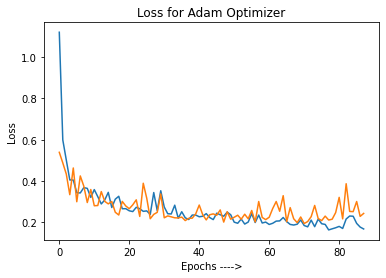

In [170]:
plt.plot(mod_adam_hist.index, mod_adam_hist["loss"])
plt.plot(mod_adam_hist.index, mod_adam_hist["val_loss"])

plt.title("Loss for Adam Optimizer")
plt.xlabel("Epochs ---->")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

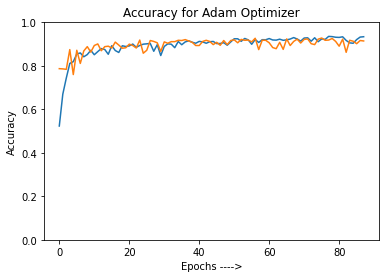

In [169]:
plt.plot(mod_adam_hist.index, mod_adam_hist["accuracy"])
plt.plot(mod_adam_hist.index, mod_adam_hist["val_accuracy"])
plt.ylim({0, 1})

plt.title("Accuracy for Adam Optimizer")
plt.xlabel("Epochs ---->")
plt.ylabel("Accuracy")

In [101]:
adam_test_loss, adam_test_accuracy = model_adam.evaluate(x_test,y_test)
print(f"Test Loss = {adam_test_loss}")
print(f"Test accuracy = {adam_test_accuracy*100}%")

27/27 [==============================] - 0s 5ms/step - loss: 0.2411 - accuracy: 0.9172
Test Loss = 0.24106407165527344
Test accuracy = 91.71597361564636%


In [102]:
adam_train_loss, adam_train_accuracy = model_adam.evaluate(x_train,y_train)
print(f"Train Loss = {adam_train_loss}")
print(f"Train accuracy = {adam_train_accuracy*100}%")

120/120 [==============================] - 1s 5ms/step - loss: 0.1480 - accuracy: 0.9423
Train Loss = 0.14800439774990082
Train accuracy = 94.22674775123596%


In [103]:
adam_val_loss, adam_val_accuracy = model_adam.evaluate(x_val,y_val)
print(f"val Loss = {adam_val_loss}")
print(f"val accuracy = {adam_val_accuracy*100}%")

30/30 [==============================] - 0s 5ms/step - loss: 0.2108 - accuracy: 0.9186
val Loss = 0.2108139842748642
val accuracy = 91.85803532600403%


- Adam has manged to converge in only 88 epochs.
- It has an accuarcy of 91.7%
- The Validation loss curve has closely follows Train loss curve.
- It signifies that there is likely to be no issue of Optimization Error.

# Stochastic Gradient Descent

In [35]:
keras.backend.clear_session()

In [36]:
model_sgd = get_model()

In [37]:
model_sgd.compile(optimizer=SGD(learning_rate=learning_rate, decay = decay) , 
              loss='categorical_crossentropy', metrics = ["accuracy"])

In [38]:
callback = EarlyStopping(monitor = "loss", patience = 10, restore_best_weights=True) 

model_sgd_history = model_sgd.fit(x_train,y_train, validation_data=(x_val, y_val), epochs= num_epochs, batch_size=  1, callbacks = [callback])

Epoch 1/200
3828/3828 [==============================] - 14s 4ms/step - loss: 0.6888 - accuracy: 0.6176 - val_loss: 0.4751 - val_accuracy: 0.7672
Epoch 2/200
3828/3828 [==============================] - 13s 3ms/step - loss: 0.4688 - accuracy: 0.7756 - val_loss: 0.3804 - val_accuracy: 0.8006
Epoch 3/200
3828/3828 [==============================] - 13s 3ms/step - loss: 0.3764 - accuracy: 0.8438 - val_loss: 0.3157 - val_accuracy: 0.8706
Epoch 4/200
3828/3828 [==============================] - 13s 3ms/step - loss: 0.3306 - accuracy: 0.8626 - val_loss: 0.3313 - val_accuracy: 0.8539
Epoch 5/200
3828/3828 [==============================] - 14s 4ms/step - loss: 0.3054 - accuracy: 0.8681 - val_loss: 0.3299 - val_accuracy: 0.8643
Epoch 6/200
3828/3828 [==============================] - 13s 3ms/step - loss: 0.2917 - accuracy: 0.8819 - val_loss: 0.2331 - val_accuracy: 0.9061
Epoch 7/200
3828/3828 [==============================] - 15s 4ms/step - loss: 0.2709 - accuracy: 0.8858 - val_loss: 0.2740 -

In [39]:
mod_sgd_hist = pd.DataFrame(model_sgd_history.history)
mod_sgd_hist

,loss,accuracy,val_loss,val_accuracy
0,0.688775,0.617555,0.475118,0.767223
1,0.468833,0.775601,0.380437,0.800626
2,0.376354,0.843783,0.315714,0.870564
3,0.330563,0.862591,0.331307,0.853862
4,0.305428,0.868077,0.329949,0.864301
...,...,...,...,...
195,0.029140,0.991902,0.040193,0.986430
196,0.029886,0.991118,0.041120,0.982255
197,0.028540,0.991902,0.061160,0.979123
198,0.027680,0.992163,0.044021,0.985386


Text(0, 0.5, 'Loss')

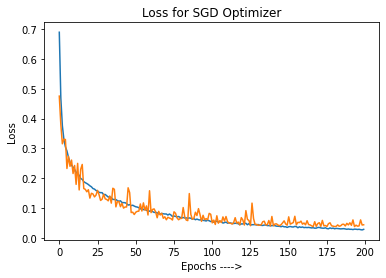

In [167]:
plt.plot(mod_sgd_hist.index, mod_sgd_hist["loss"])
plt.plot(mod_sgd_hist.index, mod_sgd_hist["val_loss"])

plt.title("Loss for SGD Optimizer")
plt.xlabel("Epochs ---->")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

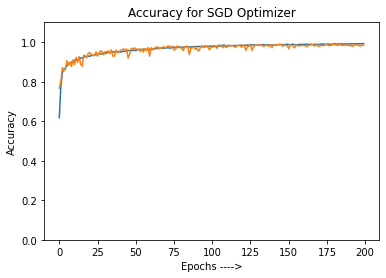

In [168]:
plt.plot(mod_sgd_hist.index, mod_sgd_hist["accuracy"])
plt.plot(mod_sgd_hist.index, mod_sgd_hist["val_accuracy"])
plt.ylim({0, 1.1})

plt.title("Accuracy for SGD Optimizer")
plt.xlabel("Epochs ---->")
plt.ylabel("Accuracy")

In [42]:
sgd_test_loss, sgd_test_accuracy = model_sgd.evaluate(x_test,y_test)
print(f"Test Loss = {sgd_test_loss}")
print(f"Test accuracy = {sgd_test_accuracy*100}%")

27/27 [==============================] - 0s 6ms/step - loss: 0.0542 - accuracy: 0.9799
Test Loss = 0.05416971072554588
Test accuracy = 97.98816442489624%


In [43]:
sgd_train_loss, sgd_train_accuracy = model_sgd.evaluate(x_train,y_train)
print(f"Train Loss = {sgd_train_loss}")
print(f"Train accuracy = {sgd_train_accuracy*100}%")

120/120 [==============================] - 1s 5ms/step - loss: 0.0296 - accuracy: 0.9906
Train Loss = 0.029602831229567528
Train accuracy = 99.05956387519836%


In [44]:
sgd_val_loss, sgd_val_accuracy = model_sgd.evaluate(x_val,y_val)
print(f"val Loss = {sgd_val_loss}")
print(f"val accuracy = {sgd_val_accuracy*100}%")

30/30 [==============================] - 0s 8ms/step - loss: 0.0449 - accuracy: 0.9843
val Loss = 0.04491714760661125
val accuracy = 98.43423962593079%


- SGD has completed all of its 200 epochs.
- It has an accuracy of 97.99%
- Both in Loss and Accuracy training curve has been closely followed by test curve.
- There is certainly no optimization Error

# Mini-Batching

In [113]:
keras.backend.clear_session()

In [114]:
model_mini = get_model()

In [115]:
model_mini.compile(optimizer=SGD(learning_rate=learning_rate, decay = decay) , 
              loss='categorical_crossentropy', metrics = ["accuracy"])

In [116]:
callback = EarlyStopping(monitor = "loss", patience = 10, restore_best_weights=True) 

model_mini_history = model_mini.fit(x_train,y_train, validation_data = (x_val, y_val), epochs= num_epochs, batch_size=  batch_size, callbacks = [callback])

Epoch 1/200
60/60 [==============================] - 1s 16ms/step - loss: 1.1753 - accuracy: 0.3942 - val_loss: 0.8913 - val_accuracy: 0.5616
Epoch 2/200
60/60 [==============================] - 1s 12ms/step - loss: 0.7929 - accuracy: 0.5815 - val_loss: 0.6926 - val_accuracy: 0.5929
Epoch 3/200
60/60 [==============================] - 1s 11ms/step - loss: 0.6450 - accuracy: 0.6816 - val_loss: 0.5214 - val_accuracy: 0.7411
Epoch 4/200
60/60 [==============================] - 1s 13ms/step - loss: 0.6160 - accuracy: 0.6870 - val_loss: 0.5427 - val_accuracy: 0.7109
Epoch 5/200
60/60 [==============================] - 1s 11ms/step - loss: 0.5761 - accuracy: 0.6946 - val_loss: 0.4739 - val_accuracy: 0.7568
Epoch 6/200
60/60 [==============================] - 1s 11ms/step - loss: 0.5458 - accuracy: 0.6983 - val_loss: 0.5990 - val_accuracy: 0.6962
Epoch 7/200
60/60 [==============================] - 1s 12ms/step - loss: 0.5406 - accuracy: 0.7194 - val_loss: 0.4579 - val_accuracy: 0.7599
Epoch 

In [117]:
mod_mini_hist = pd.DataFrame(model_mini_history.history)
mod_mini_hist

,loss,accuracy,val_loss,val_accuracy
0,1.175264,0.394201,0.891259,0.561587
1,0.792850,0.581505,0.692563,0.592902
2,0.644963,0.681557,0.521419,0.741127
3,0.616033,0.687043,0.542740,0.710856
4,0.576121,0.694619,0.473880,0.756785
...,...,...,...,...
195,0.161341,0.939655,0.151190,0.938413
196,0.169414,0.933647,0.152902,0.938413
197,0.157056,0.939916,0.158251,0.943633
198,0.164338,0.935214,0.189127,0.912317


Text(0, 0.5, 'Loss')

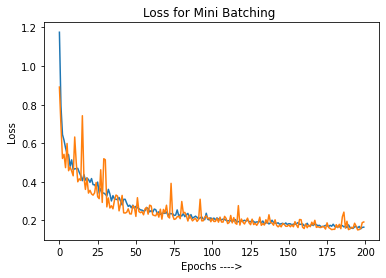

In [166]:
plt.plot(mod_mini_hist.index, mod_mini_hist["loss"])
plt.plot(mod_mini_hist.index, mod_mini_hist["val_loss"])

plt.title("Loss for Mini Batching ")
plt.xlabel("Epochs ---->")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

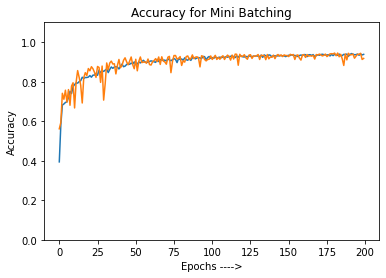

In [165]:
plt.plot(mod_mini_hist.index, mod_mini_hist["accuracy"])
plt.plot(mod_mini_hist.index, mod_mini_hist["val_accuracy"])
plt.ylim({0, 1.1})

plt.title("Accuracy for Mini Batching")
plt.xlabel("Epochs ---->")
plt.ylabel("Accuracy")

In [120]:
mini_test_loss, mini_test_accuracy = model_mini.evaluate(x_test,y_test)
print(f"Test Loss = {mini_test_loss}")
print(f"Test accuracy = {mini_test_accuracy*100}%")

27/27 [==============================] - 0s 5ms/step - loss: 0.2586 - accuracy: 0.8911
Test Loss = 0.25863346457481384
Test accuracy = 89.11242485046387%


In [121]:
mini_train_loss, mini_train_accuracy = model_mini.evaluate(x_train,y_train)
print(f"Train Loss = {mini_train_loss}")
print(f"Train accuracy = {mini_train_accuracy*100}%")

120/120 [==============================] - 1s 5ms/step - loss: 0.2050 - accuracy: 0.9138
Train Loss = 0.2049698680639267
Train accuracy = 91.37930870056152%


In [122]:
mini_val_loss, mini_val_accuracy = model_mini.evaluate(x_val,y_val)
print(f"val Loss = {mini_val_loss}")
print(f"val accuracy = {mini_val_accuracy*100}%")

30/30 [==============================] - 0s 5ms/step - loss: 0.1924 - accuracy: 0.9175
val Loss = 0.19237126410007477
val accuracy = 91.75365567207336%


- SGD Minibatching has completed all of its 200 epoch.
- It has an accuracy of 89.11%
- Other than some uneven spikes and falls at the begining loss and accuracy curves has trend of training followed by validation.

# RMS Prop

In [59]:
keras.backend.clear_session()

In [60]:
model_rms = get_model()

In [61]:
model_rms.compile(optimizer=RMSprop(learning_rate=learning_rate, decay = decay) , 
              loss='categorical_crossentropy', metrics = ["accuracy"])

In [62]:
callback = EarlyStopping(monitor = "loss", patience = 10, restore_best_weights=True) 

model_rms_history = model_rms.fit(x_train,y_train, validation_data = (x_val, y_val) , epochs= num_epochs, batch_size=  batch_size, callbacks = [callback])

Epoch 1/200
60/60 [==============================] - 2s 15ms/step - loss: 5.9207 - accuracy: 0.4216 - val_loss: 0.7880 - val_accuracy: 0.4739
Epoch 2/200
60/60 [==============================] - 1s 11ms/step - loss: 0.8570 - accuracy: 0.5384 - val_loss: 0.7293 - val_accuracy: 0.6169
Epoch 3/200
60/60 [==============================] - 1s 11ms/step - loss: 0.8584 - accuracy: 0.5609 - val_loss: 0.7417 - val_accuracy: 0.5658
Epoch 4/200
60/60 [==============================] - 1s 12ms/step - loss: 0.6991 - accuracy: 0.6144 - val_loss: 0.5832 - val_accuracy: 0.6169
Epoch 5/200
60/60 [==============================] - 1s 11ms/step - loss: 0.7039 - accuracy: 0.6207 - val_loss: 0.5934 - val_accuracy: 0.6983
Epoch 6/200
60/60 [==============================] - 1s 12ms/step - loss: 0.7622 - accuracy: 0.6220 - val_loss: 0.6111 - val_accuracy: 0.7129
Epoch 7/200
60/60 [==============================] - 1s 11ms/step - loss: 0.6632 - accuracy: 0.6539 - val_loss: 0.5309 - val_accuracy: 0.7025
Epoch 

In [63]:
mod_rms_hist = pd.DataFrame(model_rms_history.history)
mod_rms_hist

,loss,accuracy,val_loss,val_accuracy
0,5.920740,0.421630,0.788002,0.473904
1,0.857020,0.538401,0.729279,0.616910
2,0.858445,0.560867,0.741706,0.565762
3,0.699138,0.614420,0.583226,0.616910
4,0.703879,0.620690,0.593372,0.698330
...,...,...,...,...
104,0.158502,0.943835,0.512932,0.936326
105,0.185938,0.934692,0.646220,0.907098
106,0.201553,0.947231,0.662645,0.926931
107,0.190242,0.937827,0.713332,0.899791


Text(0, 0.5, 'Loss')

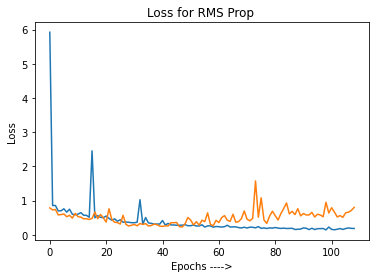

In [164]:
plt.plot(mod_rms_hist.index, mod_rms_hist["loss"])
plt.plot(mod_rms_hist.index, mod_rms_hist["val_loss"])

plt.title("Loss for RMS Prop ")
plt.xlabel("Epochs ---->")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

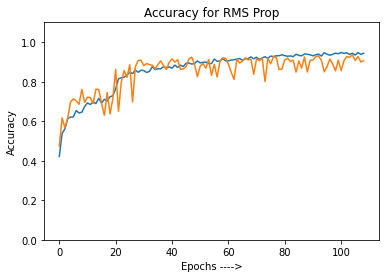

In [163]:
plt.plot(mod_rms_hist.index, mod_rms_hist["accuracy"])
plt.plot(mod_rms_hist.index, mod_rms_hist["val_accuracy"])
plt.ylim({0, 1.1})

plt.title("Accuracy for RMS Prop")
plt.xlabel("Epochs ---->")
plt.ylabel("Accuracy")

In [66]:
rms_test_loss, rms_test_accuracy = model_rms.evaluate(x_test,y_test)
print(f"Test Loss = {rms_test_loss}")
print(f"Test accuracy = {rms_test_accuracy*100}%")

27/27 [==============================] - 0s 5ms/step - loss: 0.4260 - accuracy: 0.8639
Test Loss = 0.42596927285194397
Test accuracy = 86.39053106307983%


In [67]:
rms_train_loss, rms_train_accuracy = model_rms.evaluate(x_train,y_train)
print(f"Train Loss = {rms_train_loss}")
print(f"Train accuracy = {rms_train_accuracy*100}%")

120/120 [==============================] - 1s 5ms/step - loss: 0.2296 - accuracy: 0.9133
Train Loss = 0.22963619232177734
Train accuracy = 91.3270652294159%


In [68]:
rms_val_loss, rms_val_accuracy = model_rms.evaluate(x_val,y_val)
print(f"val Loss = {rms_val_loss}")
print(f"val accuracy = {rms_val_accuracy*100}%")

30/30 [==============================] - 0s 5ms/step - loss: 0.9541 - accuracy: 0.8549
val Loss = 0.9541404247283936
val accuracy = 85.49060821533203%


- RMS Prop has managed to converge in 109 epochs.
- It has an accuarcy of 86.39%
- In the loss curve there is some dissimalirities between training and validation loss.
- It may have been the reason of decraese in accuracy.

# Adagrad

In [69]:
keras.backend.clear_session()

In [70]:
model_adagrad = get_model()

In [71]:
model_adagrad.compile(optimizer=Adagrad(learning_rate=learning_rate, decay = decay) , 
              loss='categorical_crossentropy', metrics = ["accuracy"])

In [72]:
callback = EarlyStopping(monitor = "loss", patience = 10, restore_best_weights=True) 

model_adagrad_history = model_adagrad.fit(x_train,y_train, validation_data = (x_val, y_val) , epochs= num_epochs, batch_size=  batch_size, callbacks = [callback])

Epoch 1/200
60/60 [==============================] - 1s 15ms/step - loss: 0.9853 - accuracy: 0.4979 - val_loss: 0.5917 - val_accuracy: 0.7161
Epoch 2/200
60/60 [==============================] - 1s 12ms/step - loss: 0.6392 - accuracy: 0.6510 - val_loss: 1.1779 - val_accuracy: 0.4322
Epoch 3/200
60/60 [==============================] - 1s 11ms/step - loss: 0.5776 - accuracy: 0.6826 - val_loss: 0.5383 - val_accuracy: 0.6639
Epoch 4/200
60/60 [==============================] - 1s 11ms/step - loss: 0.5205 - accuracy: 0.7090 - val_loss: 0.4522 - val_accuracy: 0.7589
Epoch 5/200
60/60 [==============================] - 1s 11ms/step - loss: 0.4836 - accuracy: 0.7458 - val_loss: 0.5305 - val_accuracy: 0.7203
Epoch 6/200
60/60 [==============================] - 1s 11ms/step - loss: 0.4723 - accuracy: 0.7625 - val_loss: 0.4339 - val_accuracy: 0.8257
Epoch 7/200
60/60 [==============================] - 1s 13ms/step - loss: 0.4414 - accuracy: 0.8015 - val_loss: 0.4220 - val_accuracy: 0.7359
Epoch 

In [73]:
mod_adagrad_hist = pd.DataFrame(model_adagrad_history.history)
mod_adagrad_hist

,loss,accuracy,val_loss,val_accuracy
0,0.985323,0.497910,0.591653,0.716075
1,0.639246,0.650993,1.177928,0.432150
2,0.577596,0.682602,0.538258,0.663883
3,0.520452,0.708986,0.452153,0.758873
4,0.483600,0.745820,0.530519,0.720251
...,...,...,...,...
195,0.143398,0.950366,0.140579,0.953027
196,0.143652,0.952456,0.143866,0.951983
197,0.143137,0.952456,0.141289,0.944676
198,0.142828,0.952978,0.135224,0.953027


Text(0, 0.5, 'Loss')

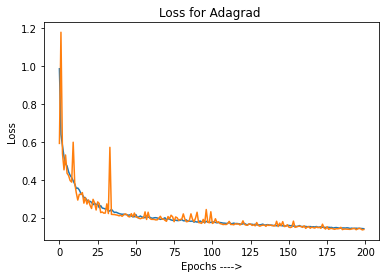

In [161]:
plt.plot(mod_adagrad_hist.index, mod_adagrad_hist["loss"])
plt.plot(mod_adagrad_hist.index, mod_adagrad_hist["val_loss"])

plt.title("Loss for Adagrad ")
plt.xlabel("Epochs ---->")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

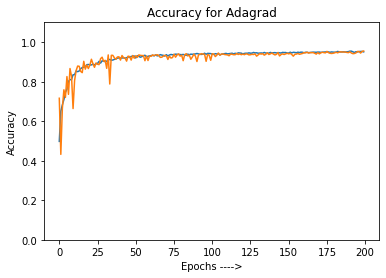

In [162]:
plt.plot(mod_adagrad_hist.index, mod_adagrad_hist["accuracy"])
plt.plot(mod_adagrad_hist.index, mod_adagrad_hist["val_accuracy"])
plt.ylim({0, 1.1})

plt.title("Accuracy for Adagrad")
plt.xlabel("Epochs ---->")
plt.ylabel("Accuracy")

In [76]:
adagrad_test_loss, adagrad_test_accuracy = model_adagrad.evaluate(x_test,y_test)
print(f"Test Loss = {adagrad_test_loss}")
print(f"Test accuracy = {adagrad_test_accuracy*100}%")

27/27 [==============================] - 0s 5ms/step - loss: 0.1635 - accuracy: 0.9467
Test Loss = 0.16346070170402527
Test accuracy = 94.67455744743347%


In [77]:
adagrad_train_loss, adagrad_train_accuracy = model_adagrad.evaluate(x_train,y_train)
print(f"Train Loss = {adagrad_train_loss}")
print(f"Train accuracy = {adagrad_train_accuracy*100}%")

120/120 [==============================] - 1s 5ms/step - loss: 0.1382 - accuracy: 0.9564
Train Loss = 0.1381683498620987
Train accuracy = 95.63741087913513%


In [78]:
adagrad_val_loss, adagrad_val_accuracy = model_adagrad.evaluate(x_val,y_val)
print(f"val Loss = {adagrad_val_loss}")
print(f"val accuracy = {adagrad_val_accuracy*100}%")

30/30 [==============================] - 0s 5ms/step - loss: 0.1374 - accuracy: 0.9551
val Loss = 0.13738252222537994
val accuracy = 95.51148414611816%


- Adagrad has finished all of its 200 epochs.
- It has an accuracy of 94.67%
- In the loss curve, there were some heavy spikes at the begining in validation loss.
- But, over the number of epochs it has converged to training loss.
- The same goes for accuracy.

# SGD with momentum

In [172]:
keras.backend.clear_session()

In [173]:
model_sgd_momentum = get_model()

In [174]:
model_sgd_momentum.compile(optimizer=SGD(learning_rate=learning_rate, decay = decay, momentum= momentum) , 
              loss='categorical_crossentropy', metrics = ["accuracy"])

In [175]:
callback = EarlyStopping(monitor = "loss", patience = 5, restore_best_weights=True) 

model_sgd_momentum_history = model_sgd_momentum.fit(x_train,y_train, validation_data = (x_val, y_val) , epochs= num_epochs, batch_size=  1, callbacks = [callback])

Epoch 1/200
3828/3828 [==============================] - 15s 4ms/step - loss: 0.7062 - accuracy: 0.6416 - val_loss: 0.4473 - val_accuracy: 0.7871
Epoch 2/200
3828/3828 [==============================] - 14s 4ms/step - loss: 0.4911 - accuracy: 0.7861 - val_loss: 0.5085 - val_accuracy: 0.7610
Epoch 3/200
3828/3828 [==============================] - 13s 3ms/step - loss: 0.4043 - accuracy: 0.8286 - val_loss: 0.3229 - val_accuracy: 0.8486
Epoch 4/200
3828/3828 [==============================] - 14s 4ms/step - loss: 0.3501 - accuracy: 0.8524 - val_loss: 0.3126 - val_accuracy: 0.8674
Epoch 5/200
3828/3828 [==============================] - 14s 4ms/step - loss: 0.3199 - accuracy: 0.8683 - val_loss: 0.2700 - val_accuracy: 0.8914
Epoch 6/200
3828/3828 [==============================] - 14s 4ms/step - loss: 0.3041 - accuracy: 0.8712 - val_loss: 0.2782 - val_accuracy: 0.8758
Epoch 7/200
3828/3828 [==============================] - 14s 4ms/step - loss: 0.2817 - accuracy: 0.8843 - val_loss: 0.2564 -

In [176]:
mod_sgd_momentum_hist = pd.DataFrame(model_sgd_momentum_history.history)
mod_sgd_momentum_hist

,loss,accuracy,val_loss,val_accuracy
0,0.706240,0.641588,0.447275,0.787056
1,0.491137,0.786050,0.508458,0.760960
2,0.404320,0.828631,0.322857,0.848643
3,0.350132,0.852403,0.312632,0.867432
4,0.319869,0.868339,0.270044,0.891441
...,...,...,...,...
86,0.031653,0.989551,0.111051,0.961378
87,0.031328,0.988767,0.113431,0.970772
88,0.030857,0.989289,0.087080,0.972860
89,0.031817,0.989551,0.089481,0.971816


Text(0, 0.5, 'Loss')

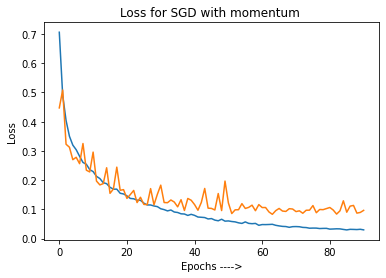

In [177]:
plt.plot(mod_sgd_momentum_hist.index, mod_sgd_momentum_hist["loss"])
plt.plot(mod_sgd_momentum_hist.index, mod_sgd_momentum_hist["val_loss"])

plt.title("Loss for SGD with momentum ")
plt.xlabel("Epochs ---->")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

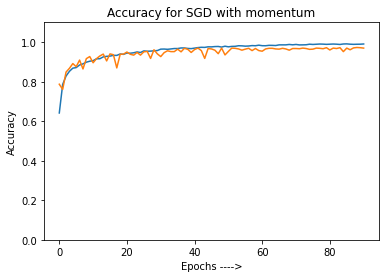

In [178]:
plt.plot(mod_sgd_momentum_hist.index, mod_sgd_momentum_hist["accuracy"])
plt.plot(mod_sgd_momentum_hist.index, mod_sgd_momentum_hist["val_accuracy"])
plt.ylim({0, 1.1})

plt.title("Accuracy for SGD with momentum")
plt.xlabel("Epochs ---->")
plt.ylabel("Accuracy")

In [179]:
sgd_momentum_test_loss, sgd_momentum_test_accuracy = model_sgd_momentum.evaluate(x_test,y_test)
print(f"Test Loss = {sgd_momentum_test_loss}")
print(f"Test accuracy = {sgd_momentum_test_accuracy*100}%")

27/27 [==============================] - 0s 5ms/step - loss: 0.0920 - accuracy: 0.9598
Test Loss = 0.0920136496424675
Test accuracy = 95.97632884979248%


In [180]:
sgd_momentum_train_loss, sgd_momentum_train_accuracy = model_sgd_momentum.evaluate(x_train,y_train)
print(f"Train Loss = {sgd_momentum_train_loss}")
print(f"Train accuracy = {sgd_momentum_train_accuracy*100}%")

120/120 [==============================] - 1s 5ms/step - loss: 0.0274 - accuracy: 0.9935
Train Loss = 0.027404436841607094
Train accuracy = 99.34691786766052%


In [181]:
sgd_momentum_val_loss, sgd_momentum_val_accuracy = model_sgd_momentum.evaluate(x_val,y_val)
print(f"val Loss = {sgd_momentum_val_loss}")
print(f"val accuracy = {sgd_momentum_val_accuracy*100}%")

30/30 [==============================] - 0s 5ms/step - loss: 0.0903 - accuracy: 0.9697
val Loss = 0.09027379751205444
val accuracy = 96.97285890579224%


- SGD Momentum with a momentum of 0.5 has managed to converge in only 91 epochs.
- It has an accuracy of 95.98%
- In the loss curve there has been some disimillaraties between training and validation loss.
- After 25 epochs, as if validation loss has reached its saturation point.
- Even though training loss has decreased quite a lot, validation loss has remained nearly the same.
- It may have caused some Optimization error.

# Section - 6

## Result

In [182]:
test_losses = [adam_test_loss, sgd_test_loss, sgd_momentum_test_loss, mini_test_loss, rms_test_loss, adagrad_test_loss]
test_accuracies = [adam_test_accuracy, sgd_test_accuracy, sgd_momentum_test_accuracy, mini_test_accuracy, rms_test_accuracy, adagrad_test_accuracy]

In [183]:
train_losses = [adam_train_loss, sgd_train_loss, sgd_momentum_train_loss, mini_train_loss, rms_train_loss, adagrad_train_loss]
train_accuracies = [adam_train_accuracy, sgd_train_accuracy, sgd_momentum_train_accuracy, mini_train_accuracy, rms_train_accuracy, adagrad_train_accuracy]

In [184]:
val_losses = [adam_val_loss, sgd_val_loss, sgd_momentum_val_loss, mini_val_loss, rms_val_loss, adagrad_val_loss]
val_accuracies = [adam_val_accuracy, sgd_val_accuracy, sgd_momentum_val_accuracy, mini_val_accuracy, rms_val_accuracy, adagrad_val_accuracy]

In [185]:
comparison =  pd.DataFrame([train_losses, train_accuracies, test_losses, test_accuracies, val_losses, val_accuracies]).T
comparison.columns = ["Train Loss", "Train Accuracy", "Test Loss", "Test Accuracy", "Val Loss", "Val Accuracy"]
comparison.index = ["Adam", "SGD", "SGD momentum", "SGD minibatching", "RMS prop", "Adagrad"]
comparison

,Train Loss,Train Accuracy,Test Loss,Test Accuracy,Val Loss,Val Accuracy
Adam,0.148004,0.942267,0.241064,0.917160,0.210814,0.918580
SGD,0.029603,0.990596,0.054170,0.979882,0.044917,0.984342
SGD momentum,0.027404,0.993469,0.092014,0.959763,0.090274,0.969729
SGD minibatching,0.204970,0.913793,0.258633,0.891124,0.192371,0.917537
RMS prop,0.229636,0.913271,0.425969,0.863905,0.954140,0.854906
Adagrad,0.138168,0.956374,0.163461,0.946746,0.137383,0.955115


From the above table we can clearly see how good each optimizer has worked.
- Even though, both SGD and SGD Momentum has training accuracy of 0.99
- It is clear that SGD has performed better in test and validation.

- Whereas, both SGD Minibatching and RMSProp has training accuracy of 0.91
- RMSProp has performed worse in test and validation.

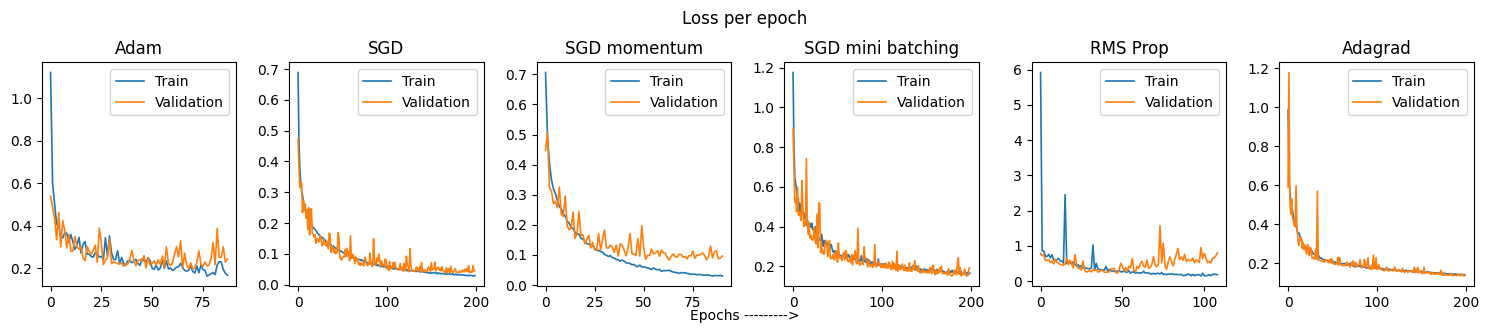

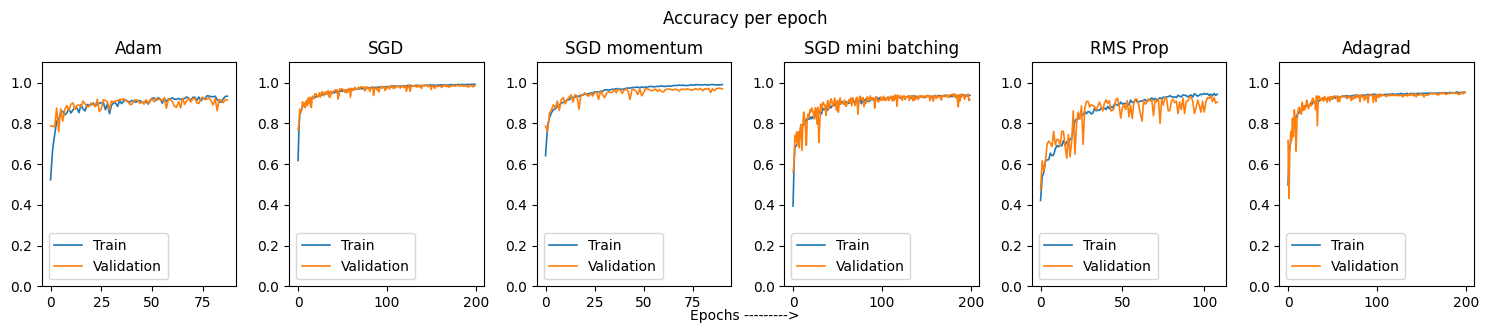

In [186]:
mod_hist = [mod_adam_hist, mod_sgd_hist, mod_sgd_momentum_hist, mod_mini_hist, mod_rms_hist, mod_adagrad_hist]
solvers = ["Adam", "SGD", "SGD momentum", "SGD mini batching", "RMS Prop", "Adagrad"]


fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 3), dpi = 100)

for i in range(len(solvers)):
  axes[i].plot(mod_hist[i].index, mod_hist[i]["loss"], label = "Train", linewidth = 1.2)
  axes[i].plot(mod_hist[i].index, mod_hist[i]["val_loss"], label = "Validation", linewidth = 1.2)
  axes[i].legend()
  axes[i].set_title(solvers[i])

fig.suptitle("Loss per epoch", y = 1.05)
fig.text(0.5, 0.03, 'Epochs --------->', ha='center', va='center')
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 3), dpi = 100)

for i in range(len(solvers)):
  axes[i].plot(mod_hist[i].index, mod_hist[i]["accuracy"], label = "Train", linewidth = 1.2)
  axes[i].plot(mod_hist[i].index, mod_hist[i]["val_accuracy"], label = "Validation", linewidth = 1.2)
  axes[i].legend()
  axes[i].set_ylim({0, 1.1})
  axes[i].set_title(solvers[i])

fig.suptitle("Accuracy per epoch", y = 1.05)
fig.text(0.5, 0.03, 'Epochs --------->', ha='center', va='center')
fig.tight_layout()
plt.show()


From the plots we can see that in case of SGD and Adagrad training and validation curve has nearly followed each other. Whereas, there has been some violations in other optimizers.

It explains why the difference between training and validation accuracy is so close to each other for these two optimizers.
- SGD training 0.99, validation 0.984
- Adagrad training 0.956 validation 0.955

Where as, that is not the case for other optimizers

# References

### Neural Network
The CNN is originally inspired from Lenet-5 keras on kaggle.
The original Lenet had an issue of overfitting the data (upto 100%). 
So, the parameters were changed and one fully connected layer and one convolutional layer were removed to suit the purpose.
Here, is the link for original Lenet-5 with keras.

<a href="https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48/notebook">https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48/notebook</a>

To test the model for different optimizers, it was necessary to redefine the model again and again.
To avoid this problem, the model has been defined as a function. This trick was found from.

<a href="https://stackoverflow.com/questions/52299108/running-keras-sequential-model-with-different-optimizers">https://stackoverflow.com/questions/52299108/running-keras-sequential-model-with-different-optimizers</a>

The image of Lenet-5 architecture was taken from,

<a href="https://www.analyticsvidhya.com/blog/2021/03/the-architecture-of-lenet-5/">https://www.analyticsvidhya.com/blog/2021/03/the-architecture-of-lenet-5/</a>


### Data Preprocessing
Some of the images in the dataset were RGB (64, 64, 3) and some of them were CMYK (256, 256, 4).
They all needed to be convarted to RGB for the ease of handling. A StackOverflow post helped a lot in this case.

<a href="https://stackoverflow.com/questions/14088375/how-can-i-convert-rgb-to-cmyk-and-vice-versa-in-python">https://stackoverflow.com/questions/14088375/how-can-i-convert-rgb-to-cmyk-and-vice-versa-in-python</a>

No numbered or encoded data labels were included in the dataset. In this case, keras official documentation of to_categorical was useful to make One Hot Encoded labels for the dataset.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical">https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical</a>

To fit into the model and increase the speed of each epoch, split data were to be converted to tensors. Again, keras official documentation of to_tensor was of great help.

<a href="https://www.tensorflow.org/api_docs/python/tf/convert_to_tensor">https://www.tensorflow.org/api_docs/python/tf/convert_to_tensor</a>

The image of CMYK RGB is from,

<a href="https://towardsdatascience.com/understand-and-visualize-color-spaces-to-improve-your-machine-learning-and-deep-learning-models-4ece80108526">https://towardsdatascience.com/understand-and-visualize-color-spaces-to-improve-your-machine-learning-and-deep-learning-models-4ece80108526</a>

# End